<a href="https://colab.research.google.com/github/Lutheeshgoparapu/mnist-classification/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[50]


In [ ]:
single_image.shape


(28, 28)

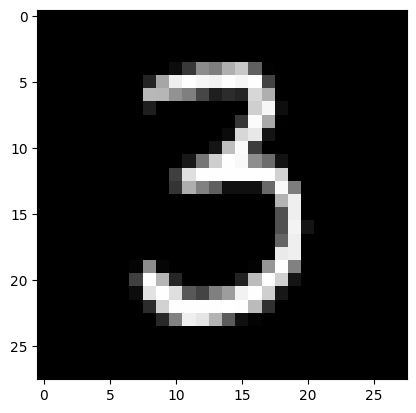

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()





0

In [ ]:
X_train.max()




255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0




In [ ]:
X_train_scaled.min()




0.0

In [ ]:
X_train_scaled.max()




1.0

In [ ]:
y_train[0]




5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

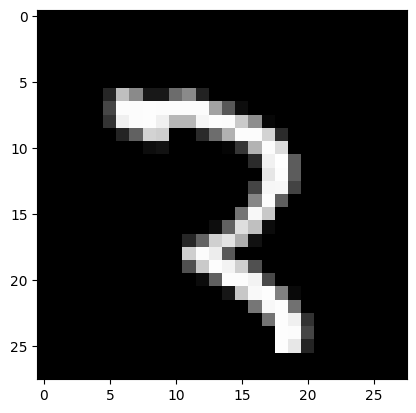

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
input = keras.Input(shape=(28,28,1))
model.add(input)
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 41s 42ms/step - loss: 0.2838 - accuracy: 0.9156 - val_loss: 0.0961 - val_accuracy: 0.9720
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0668 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0637 - val_accuracy: 0.9806
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0526 - val_accuracy: 0.9823
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0491 - val_accuracy: 0.9854


<Axes: >

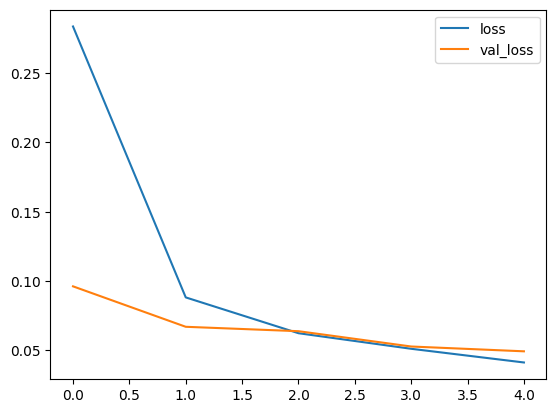

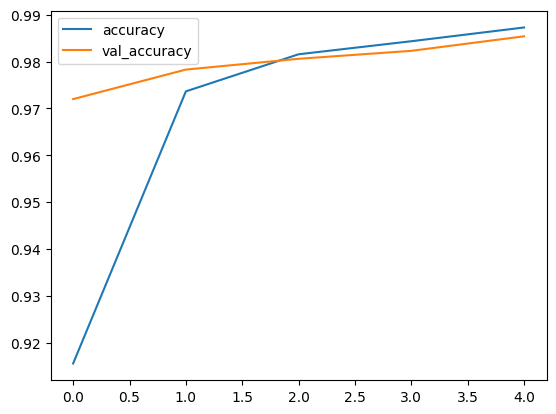

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 2s 5ms/step
[[ 973    0    0    0    0    3    1    1    2    0]
 [   0 1131    0    1    0    0    0    0    3    0]
 [   2    2  999    6    1    0    0   10   12    0]
 [   0    0    0 1004    0    2    0    0    4    0]
 [   0    1    0    0  977    0    0    1    1    2]
 [   1    0    0    6    0  881    1    0    3    0]
 [   7    3    0    0    1    7  935    0    5    0]
 [   0    2    2    3    0    1    0 1019    1    0]
 [   2    1    0    1    0    2    0    3  964    1]
 [   0    3    0    7    8    4    0    7    9  971]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98  

In [ ]:
img = image.load_img('deeeeeep.png')


In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('deeeeeep.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(x_single_prediction)


[7]


G.Lutheesh 212221230029


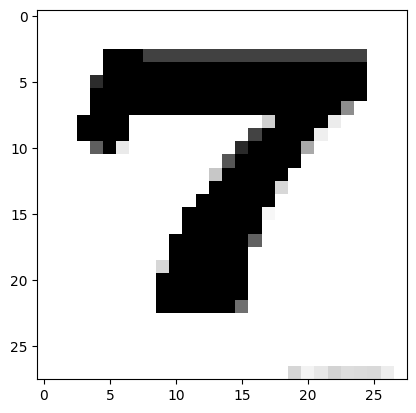

In [ ]:
print("G.Lutheesh 212221230029")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 22ms/step


In [ ]:
print(x_single_prediction)


[3]
